In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
coords_in = np.loadtxt('coords.txt')
#coords_in

In [3]:
print(min(coords_in[:,0]), min(coords_in[:,1]))
xmin = min(coords_in[:,0])
ymin = min(coords_in[:,1])

xzero = (max(coords_in[:,0])-xmin)/2
yzero = (max(coords_in[:,1])-ymin)/2
print(xzero, yzero)

423974.0 6147543.0
2728.5 1952.0


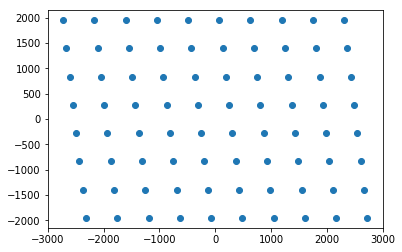

In [4]:
coords_x=coords_in[:,0]-xzero-xmin
coords_y=coords_in[:,1]-yzero-ymin
coords=[coords_x,coords_y]
coords=np.array(coords).T
nturb=np.shape(coords)[0]
plt.scatter(coords[:,0], coords[:,1])

In [5]:
#Arrays for pairwise distances and angles
#Angle 0: x directıon. Angle pi/2: y directıon
distance=np.zeros((nturb,nturb))
angles=np.zeros((nturb,nturb))
for i in range(0,nturb):
    distance[i,:]=np.sqrt(np.square(coords[i,0]-coords[:,0])+np.square(coords[i,1]-coords[:,1]))
    angles[i,:]=np.arctan2(coords[:,1]-coords[i,1],coords[:,0]-coords[i,0])
#Rotate angles so that north=0 and convert to degre
angles=angles*180/np.pi
angles[0,1]

-83.964270266685389

In [6]:
#Rotating angles to wind direction
windangle=5 #degrees
rotangles=np.mod(angles-windangle+180,360)-180

In [7]:
(np.sort(distance))[0,2]

561.11050605027879

In [8]:
def rotate(angle,coords):
    angle = np.pi*angle/180.
    rotcoordx = []
    rotcoordy = []
    for coord in coords:
        rotcoordx+=[coord[0]*np.cos(angle)-coord[1]*np.sin(angle)]
        rotcoordy+=[coord[0]*np.sin(angle)+coord[1]*np.cos(angle)]
    rotcoords=[rotcoordx,rotcoordy]
    rotcoords=np.array(rotcoords).T   
    return rotcoords 
    

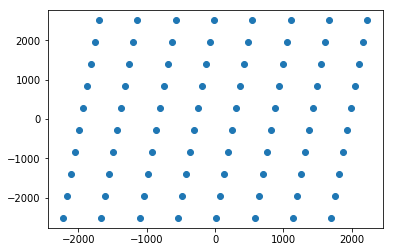

In [9]:
#print rotate(254,coords)[:,0]
plt.scatter(rotate(264,coords)[:,0],rotate(264,coords)[:,1])